# Week 8 Assignment - High Frequency Words

**By Eddie Xu and Mohamed Hassan-El Serafi**

Please answer the following questions in an IPython Notebook, posted to GitHub.
1. Choose a corpus of interest.
2. How many total unique words are in the corpus? (Please feel free to define unique words in any interesting,
defensible way).
3. Taking the most common words, how many unique words represent half of the total words in the corpus?
4. Identify the 200 highest frequency words in this corpus.
5. Create a graph that shows the relative frequency of these 200 words.
6. Does the observed relative frequency of these words follow Zipf’s law? Explain.
7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

## Corpus

For this assignment, we used a speech from then-Presidential candidate Joe Biden, given during the Democratic National Convention in 2020. The dataset was retrieved from Kaggle, which you can find here: https://www.kaggle.com/datasets/christianlillelund/joe-biden-2020-dnc-speech

In [1]:
# import libraries
import pandas as pd
import numpy as np
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
#from nltk.book import *
from matplotlib import style
import string
from random import sample
import nltk
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("joe_biden_dnc_2020_speech.csv")

In [3]:
df.head()

,TEXT
0,The civil rights movement left us with this wi...
1,"But while I'll be a democratic candidate, I wi..."
2,This campaign isn't just about winning votes. ...
3,So the question for us is simple. Are we ready...
4,5 million Americans infected by COVID-19. More...


In [4]:
# combine rows and show full text
text = " ".join(xx for xx in df.TEXT)

## 2. How many total unique words are in the corpus? (Please feel free to define unique words in any interesting, defensible way).

In [5]:
# lower case
text = text.lower()

In [6]:
len(text)

18359

In [7]:
sw_list = stopwords.words('english')
sw_list += list(string.punctuation)
sw_list += ["''", '""', '...', '``', '’', '“', '’', '”', '‘', '‘', '.',
            'said', 'and', 'but', 'the', '-', '–', '—', 'let', ',', 'get', '1', '1', 'like', 'lot', "'s","'ll","'re","n't","'ve","'m"]
sw_set = set(sw_list)

In [8]:
# tokenize text
speech_words = nltk.word_tokenize(text)

In [9]:
len(speech_words)

3945

In [10]:
# remove single characters
speech_words = [word for word in speech_words if len(word) > 1]

# remove stopwords
speech_words = [word for word in speech_words if word not in sw_set]

In [11]:
len(speech_words)

1576

We have identified 1,576 unique words in the speech. Next, we will create a frequency distribution for each of the unique words:

In [12]:
# count word frequencies
speech_word_freqs = nltk.FreqDist(speech_words)

In [13]:
len(speech_word_freqs)

833

In [14]:
speech_word_freq_df = pd.DataFrame(sorted(speech_word_freqs.items(), key=lambda x: x[1], reverse=True), 
                               columns=['Word', 'Frequency'])

In [15]:
len(speech_word_freq_df)

833

## 3. Taking the most common words, how many unique words represent half of the total words in the corpus?

In [16]:
half_words = 0
distinct_count = 0
total_words = len(text)
for i in range(len(speech_word_freq_df)):
    half_words += speech_word_freq_df.iloc[i, 1]
    distinct_count = i
    if half_words > total_words/2:
        break

print(i, half_words, total_words)

832 1576 18359


There are 832 unique words that appear 1,576 times out of the total number of words in the corpus, 18,359.

## 4. Identify the 200 highest frequency words in this corpus.

In [17]:
speech_word_freqs

FreqDist({'america': 30, 'president': 29, 'us': 18, 'one': 18, 'people': 17, 'going': 12, 'never': 12, 'nation': 12, 'light': 11, 'time': 11, ...})

In [18]:
most_common_words = speech_word_freqs.most_common(200)
most_common_words

[('america', 30),
 ('president', 29),
 ('us', 18),
 ('one', 18),
 ('people', 17),
 ('going', 12),
 ('never', 12),
 ('nation', 12),
 ('light', 11),
 ('time', 11),
 ('make', 11),
 ('great', 11),
 ('united', 10),
 ('hope', 10),
 ('moment', 10),
 ('much', 8),
 ('together', 8),
 ('american', 8),
 ('love', 8),
 ('history', 8),
 ('say', 8),
 ('world', 8),
 ('way', 7),
 ('hard', 7),
 ('country', 7),
 ('know', 7),
 ('take', 7),
 ('million', 7),
 ('back', 7),
 ('protect', 7),
 ('always', 7),
 ('work', 6),
 ('promise', 6),
 ('believe', 6),
 ('americans', 6),
 ('every', 6),
 ('current', 5),
 ('fear', 5),
 ('new', 5),
 ('could', 5),
 ('winning', 5),
 ('injustice', 5),
 ('opportunity', 5),
 ('ready', 5),
 ('years', 5),
 ('many', 5),
 ('look', 5),
 ('year', 5),
 ('family', 5),
 ('first', 5),
 ('life', 5),
 ('purpose', 5),
 ('pay', 5),
 ('powerful', 5),
 ('left', 4),
 ('give', 4),
 ('words', 4),
 ('darkness', 4),
 ('long', 4),
 ('worst', 4),
 ('states', 4),
 ('job', 4),
 ('virus', 4),
 ('well', 4),
 (

In [19]:
speech_word_freq_df.head(200)

,Word,Frequency
0,america,30
1,president,29
2,us,18
3,one,18
4,people,17
...,...,...
195,away,2
196,obama,2
197,worked,2
198,speaking,2


## 5. Create a graph that shows the relative frequency of these 200 words.

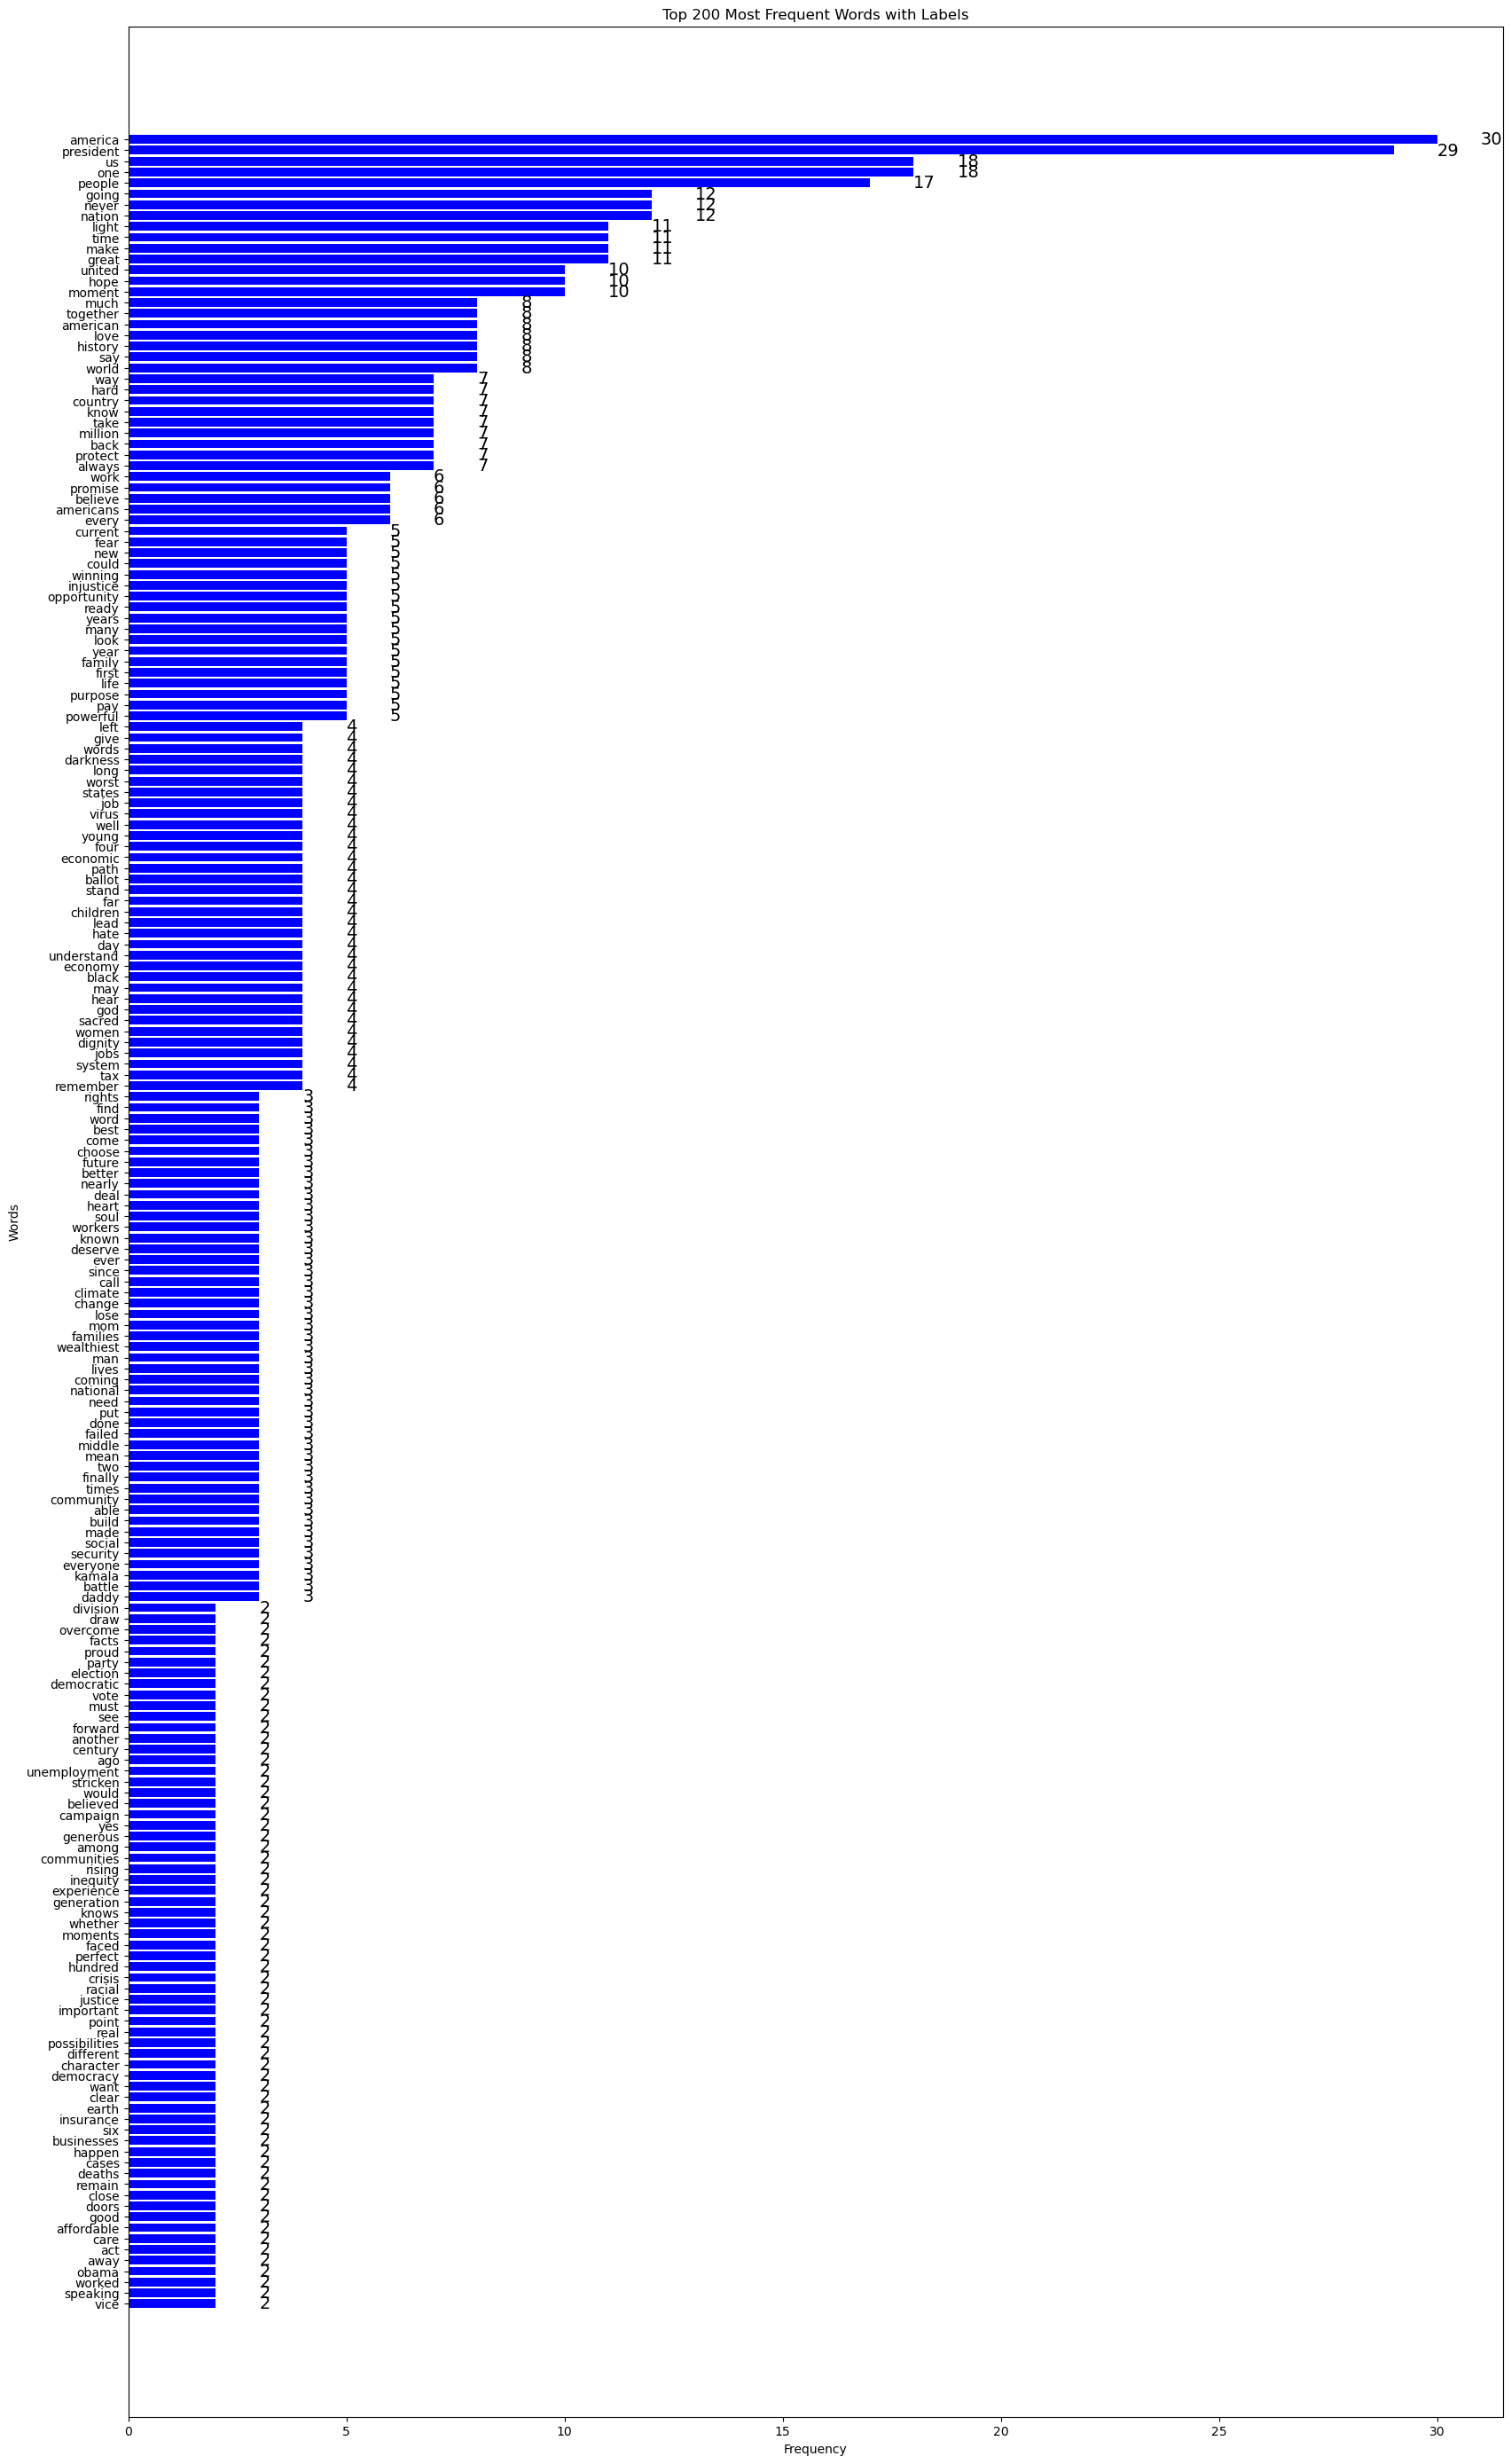

In [20]:
plt.figure(figsize=(20, 35))
bars = plt.barh([word for word, _ in most_common_words], [freq for _, freq in most_common_words], color='blue')

# Add data labels
for bar, (word, freq) in zip(bars, most_common_words):
    plt.text(bar.get_width() + 1,  # X-coordinate (right of the bar)
             bar.get_y() + bar.get_height()/2,  # Y-coordinate (center of the bar)
             str(freq),  # Display the frequency
             va='center', ha='left', color='black', fontsize=14)

# Labels and title
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 200 Most Frequent Words with Labels')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest frequency on top
plt.show()

## 6. Does the observed relative frequency of these words follow Zipf’s law? Explain.

Zipf's law states that the frequency of a word type is inversely proportional to its rank. For example, the 50th most common word type should occur three times as frequently as the 150th most common word type (Bird, Steven, et al. Pg. 76). To look at it another way, the most common word will occur about twice as often as the second most common word, three times as often as the third most common word, and so on. The equation belows represents how to calculate the word frequency given the rank of the word:

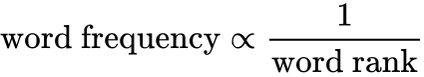

In [21]:
# 50th Word
speech_word_freq_df.iloc[49]

Word         first
Frequency        5
Name: 49, dtype: object

In [22]:
# 150th Word
speech_word_freq_df.iloc[149]

Word         ago
Frequency      2
Name: 149, dtype: object

In [23]:
# Most Common Word
speech_word_freq_df.iloc[0]

Word         america
Frequency         30
Name: 0, dtype: object

In [24]:
# 2nd Most Common Word
speech_word_freq_df.iloc[1]

Word         president
Frequency           29
Name: 1, dtype: object

Based on the examples above, the word **first** is ranked 50th and appears 5 times in the corpus, while the 150th word **ago** appears 2 times, which is slightly less than 3 times the amount as the 50th word. The most common word **america** appears 30 times, while the 2nd most common word **president** appears 29 times. Based on these two examples, the relative frequency of these words does not appear to exactly follow Zipf's law.
Because we are only looking at the most unique words, the removal of stopwords could have affected how Zipf's Law is followed for this corpus. 

## 7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

The words in this corpus were derived from a political speech. In other corpora, the words would probably be different, depending on the genre of book or topic of a written text. The top 5 common unique words in this corpus are **america**, **president**, **us**, **one**, and **people**. Based on these top common unique words, the message being communicated is to bring people together using america and presidency to convey those themes. We would venture to guess that this isn't common in all corpora, and the results of top common unique words would be different if analyzing a different corpus.

In [25]:
from random import sample
def unusual_words(text):
    text_vocab  = set(w.lower() for w in text if w.isalpha())
    english_vocab = set(w.lower() for w in nltk.corpus.words.words())
    unusual = text_vocab.difference(english_vocab)
    return sorted(unusual)

unusual = unusual_words(speech_words)
print( 'Number of Unusual Words: ', len( unusual ) )
print( 'A Random Sampling of 100 Unusual Words: ' )
print( sample(unusual,100) )

Number of Unusual Words:  183
A Random Sampling of 100 Unusual Words: 
['breaks', 'refuses', 'children', 'lighted', 'schools', 'adversaries', 'created', 'thirties', 'voices', 'supremacists', 'words', 'mom', 'darkest', 'veins', 'childcare', 'opens', 'heard', 'okay', 'changed', 'ensued', 'including', 'fans', 'founded', 'lessons', 'passed', 'calls', 'accelerating', 'paid', 'empowered', 'homes', 'investments', 'cuts', 'flames', 'values', 'seniors', 'gunned', 'greatest', 'served', 'grandchildren', 'tatters', 'premiums', 'healthcare', 'others', 'loved', 'parents', 'cozying', 'elections', 'medicare', 'broadband', 'bulging', 'blames', 'looked', 'years', 'europe', 'sucked', 'klansmen', 'wealthiest', 'experts', 'inspires', 'lowers', 'fields', 'charlottesville', 'families', 'communities', 'heaney', 'biden', 'doors', 'manufacturing', 'obama', 'tells', 'businesses', 'knocked', 'rooting', 'challenging', 'highways', 'brothers', 'dollars', 'documents', 'tougher', 'dictators', 'deductibles', 'billions'

## References

* Bird, Steven, et al. Natural Language Processing with Python. O'Reilly Media, Inc., 2009. 
* https://pmc.ncbi.nlm.nih.gov/articles/PMC4176592/
* https://medium.com/design-bootcamp/how-zipfs-law-can-help-you-understand-the-world-around-you-b6e34c64e9d5
* https://www.geeksforgeeks.org/zipfs-law/